# EDA for Black Friday sale dataset + Feature Engineering
# Cleaning and preparing the data for model training

# Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Importing the train dataset

df_train = pd.read_csv('https://raw.githubusercontent.com/Ritesh5444/Dataset-for-EDA-and-FE/refs/heads/main/Black%20Friday/Black_Friday_train.csv')

In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
#Import the test dataset

df_test = pd.read_csv('https://raw.githubusercontent.com/Ritesh5444/Dataset-for-EDA-and-FE/refs/heads/main/Black%20Friday/Blac_Friday_test.csv')

In [7]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#  In a Kaggle competition, the preprocessing has to be done on both the train and test dataset. So we will combine them

In [9]:
# Combining train and test dataset

#df_merge = pd.merge(df_train,df_test, on = 'User_ID') -  we cannot do this because we want data to be added in rows and not columns

df = pd.concat([df_train, df_test])

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [12]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [13]:
#Size of the dataset
df.shape

# The dataset has 783667 records

(783667, 12)

In [14]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


We can see the User_ID feature is of no value, so we can drop it from dataframe

In [16]:
#Dropping User_ID from dataframe

df.drop('User_ID', axis = 1, inplace = True)

In [17]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


# We will convert the categorical features into numberical values so that model can understand it.

Categorical features - Gender, Age, City_Category, Stay_In_Current_City_Years

In [19]:
# Handle categortical feature Gender

#There was many ways to do it, but here we are using map function

#Male = 0
#Female = 1

df['Gender'] = df['Gender'].map({'M':0, 'F':1})

In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,1,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,1,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,0,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
df['Gender'].unique()

array([1, 0], dtype=int64)

In [22]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [23]:
# Handle categortical feature age

#pd.get_dummies(df['Age'], drop_first = True)

In [24]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2, '26-35': 3, '36-45': 4, '46-50': 5,'51-55':6, '55+': 7})

In [25]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [26]:
# Handle categortical feature City

#pd.get_dummies(df['City_Category'])

df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [27]:
df['City_Category'] = df['City_Category'].map({'A':1, 'B': 2, 'C': 3})

In [28]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,NaN,NaN,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,NaN,1057.0
4,P00285442,0,7,16,3,4+,0,8,NaN,NaN,7969.0


In [29]:
# Handle categortical feature Stay_In_Current_City_Years

In [30]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
# Here we will just replace 4+ with 4

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [32]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [33]:
# Missing values

df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

Purhcase column NULL data is ok because it's coming due to test data. So we will fix Product_Category_2 and Product_Category_3

In [35]:
#Focus on replacing missing values for Product_Category_2

df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

# Observation - 
We can see that the value in Product_Category_2 feature is discrete numerical values, so we will replace the NULL values with 'Mode'. 
We cannot use mean to replace because we are it's a categorical feature.

In [37]:
df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [38]:
df['Product_Category_2'].mode()[0]

8.0

In [39]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [40]:
df['Product_Category_2'].isnull().sum()

0

# Focus on replacing missing values for Product_Category_3

In [42]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [43]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: count, dtype: int64

In [44]:
df['Product_Category_3'].isnull().sum()

545809

# Observation - 
We can see that the value in Product_Category_3 feature is discrete numerical values, so we will replace the NULL values with 'Mode'. 
We cannot use mean to replace because we are it's a categorical feature.

In [46]:
df['Product_Category_3'].mode()[0]

16.0

In [47]:
#Replacing missing values with mode

df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [48]:
df['Product_Category_3'].isnull().sum()

0

In [49]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

We can see that data type of 'Stay_In_Current_City_Years' is object but we have converted it to numerical values, so we will correct the datatype of
this column

In [51]:
# Convert object to integers

df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int32  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 68.8+ MB


## Visualisation

In [54]:
#sns.pairplot(df)
#sns.plot()

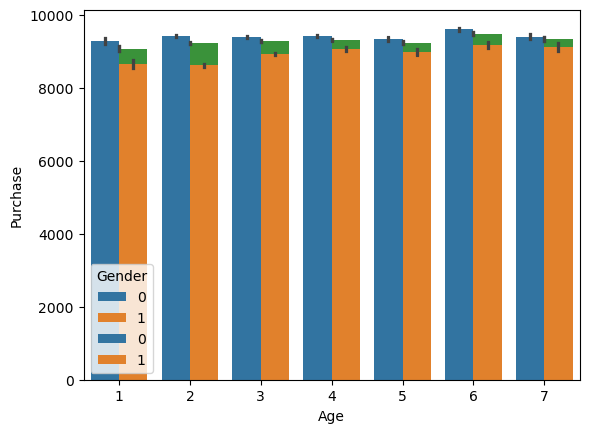

In [74]:
#Visulization of Age vs Purchase

sns.barplot(data = df, x = 'Age', y = 'Purchase', hue = 'Gender')
plt.show()

# Observation

We can see that all age groups are buying the product almost equally. And male (0) buyers are little more than female buyers(1)

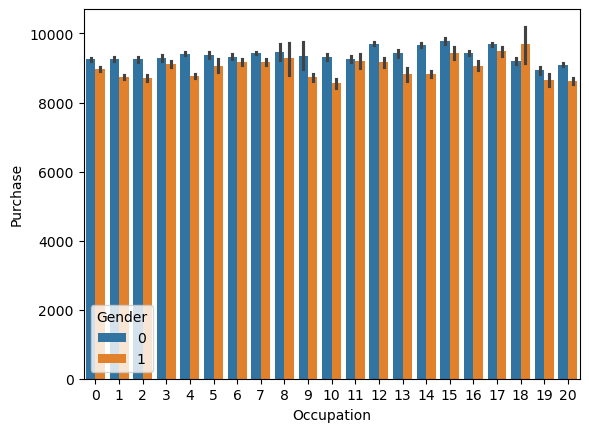

In [89]:
#Visulization of Occupation vs Purchase 

sns.barplot(data = df, x = 'Occupation', y = 'Purchase', hue = 'Gender')


plt.show()

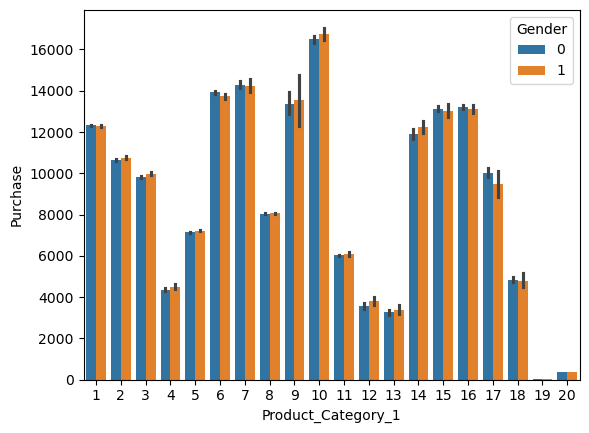

In [91]:
#Visulization of Product_Category_1 vs Purchase 

sns.barplot(data = df, x = 'Product_Category_1', y = 'Purchase', hue = 'Gender')
plt.show()

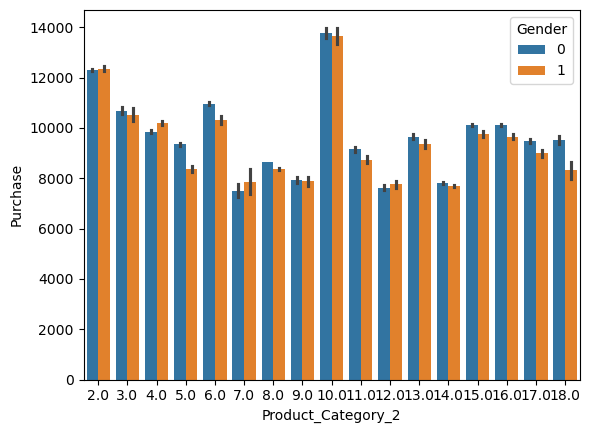

In [92]:
#Visulization of Product_Category_2 vs Purchase 

sns.barplot(data = df, x = 'Product_Category_2', y = 'Purchase', hue = 'Gender')
plt.show()

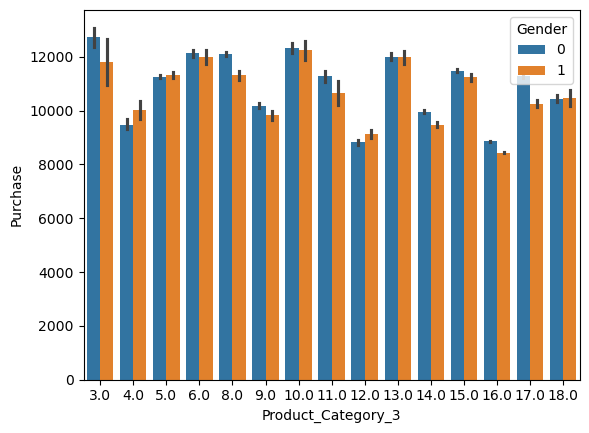

In [93]:
#Visulization of Product_Category_3 vs Purchase 

sns.barplot(data = df, x = 'Product_Category_3', y = 'Purchase', hue = 'Gender')
plt.show()

# Observation

There is uniformity in sales of Product_Category_3 products the most, followed by Product_Category_2 and then Product_Category_1

In [97]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,1,1,10,1,2,0,3,8.0,16.0,8370.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0,15200.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0,1422.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0,1057.0
4,P00285442,0,7,16,3,4,0,8,8.0,16.0,7969.0


In [99]:
# Seprating the train and test data

df_test = df[df['Purchase'].isnull()]

In [101]:
df_test.size

2569589

In [103]:
df_train = df[~df['Purchase'].isnull()]

In [107]:
df_train.size

6050748

In [131]:
X = df_train.drop('Purchase', axis = 1)

#:-1 is done to remove the Purhcase column from the train dataset

In [133]:
X.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,P00069042,1,1,10,1,2,0,3,8.0,16.0
1,P00248942,1,1,10,1,2,0,1,6.0,14.0
2,P00087842,1,1,10,1,2,0,12,8.0,16.0
3,P00085442,1,1,10,1,2,0,12,14.0,16.0
4,P00285442,0,7,16,3,4,0,8,8.0,16.0


In [117]:
y = df_train['Purchase']

In [135]:
X.shape

(550068, 10)

In [137]:
y.shape

(550068,)

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# Feature scaling

In [141]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'P00120042'

In [ ]:
#Because of above error "ValueError: could not convert string to float: 'P00120042'", we will remove Product Id column from X_train

In [145]:
X_train.drop('Product_ID',axis = 1, inplace = True)

In [151]:
X_test.drop('Product_ID',axis = 1, inplace = True)

In [156]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\rites\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# Train your model